In [1]:
import re
import pandas as pd

In [2]:
df = open('whatsapp.txt','r',encoding='utf-8')

In [3]:
data = df.read()

In [4]:
pattern = r'\d{2}/\d{2}/\d{4},\s\d{1,2}:\d{2}\s*(?:am|pm)\s-\s'


In [5]:
messages = [m for m in re.split(pattern, data) if m.strip()]


In [6]:
data = data.replace('\u202f', ' ')


In [7]:
dates = re.findall(pattern,data)

In [8]:
print(len(messages), len(dates))

4337 4337


In [9]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})
#Convert message_date type
df['message_date'] = (
    df['message_date']
    .str.replace('\u202f', ' ', regex=False)
    .str.replace(r'\s-\s$', '', regex=True)
)

df['message_date'] = pd.to_datetime(df['message_date'],format='%d/%m/%Y, %I:%M %p')

df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2025-05-31 18:05:00
1,Soham Sawant: Waiting for this message\n,2025-05-29 19:35:00
2,Rosesh Chauhan: Mujhe sab message send kar na\n,2025-05-31 18:07:00
3,Rosesh Chauhan: Cdac ke vagere\n,2025-05-31 18:07:00
4,Rosesh Chauhan: Imp honge jo\n,2025-05-31 18:07:00


In [10]:
df.shape

(4337, 2)

In [11]:
users = []
messages_list = []

for msg in df['user_message']:
    entry = re.split(r'^([^:]+):\s', msg, maxsplit=1)

    if len(entry) > 1:
        users.append(entry[1])
        messages_list.append(entry[2])
    else:
        users.append('group_notification')
        messages_list.append(entry[0])


In [12]:
df['user'] = users
df['message'] = messages_list
df.drop(columns=['user_message'], inplace=True)


In [13]:
df.head()

,date,user,message
0,2025-05-31 18:05:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2025-05-29 19:35:00,Soham Sawant,Waiting for this message\n
2,2025-05-31 18:07:00,Rosesh Chauhan,Mujhe sab message send kar na\n
3,2025-05-31 18:07:00,Rosesh Chauhan,Cdac ke vagere\n
4,2025-05-31 18:07:00,Rosesh Chauhan,Imp honge jo\n


In [14]:
df['year'] = df['date'].dt.year

In [15]:
df.head()

,date,user,message,year
0,2025-05-31 18:05:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025
1,2025-05-29 19:35:00,Soham Sawant,Waiting for this message\n,2025
2,2025-05-31 18:07:00,Rosesh Chauhan,Mujhe sab message send kar na\n,2025
3,2025-05-31 18:07:00,Rosesh Chauhan,Cdac ke vagere\n,2025
4,2025-05-31 18:07:00,Rosesh Chauhan,Imp honge jo\n,2025


In [16]:
df['month'] = df['date'].dt.month_name()

In [17]:
df.head()

,date,user,message,year,month
0,2025-05-31 18:05:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025,May
1,2025-05-29 19:35:00,Soham Sawant,Waiting for this message\n,2025,May
2,2025-05-31 18:07:00,Rosesh Chauhan,Mujhe sab message send kar na\n,2025,May
3,2025-05-31 18:07:00,Rosesh Chauhan,Cdac ke vagere\n,2025,May
4,2025-05-31 18:07:00,Rosesh Chauhan,Imp honge jo\n,2025,May


In [18]:
df['day'] = df['date'].dt.day

In [19]:
df['hour'] = df['date'].dt.hour

In [20]:
df['minute'] = df['date'].dt.minute

In [21]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2025-05-31 18:05:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025,May,31,18,5
1,2025-05-29 19:35:00,Soham Sawant,Waiting for this message\n,2025,May,29,19,35
2,2025-05-31 18:07:00,Rosesh Chauhan,Mujhe sab message send kar na\n,2025,May,31,18,7
3,2025-05-31 18:07:00,Rosesh Chauhan,Cdac ke vagere\n,2025,May,31,18,7
4,2025-05-31 18:07:00,Rosesh Chauhan,Imp honge jo\n,2025,May,31,18,7


In [22]:
words = []
for message in df['message']:
  words.extend(message.split())

In [23]:
len(words)

18583

In [24]:
from urlextract import URLExtract
extractor = URLExtract()

In [25]:
links = []

for message in df['message']:
  links.extend(extractor.find_urls(message))


In [26]:
len(links)

27

In [27]:
x = df['user'].value_counts()

In [28]:
import matplotlib.pyplot as plt 

In [29]:
name = x.index
count = x.values

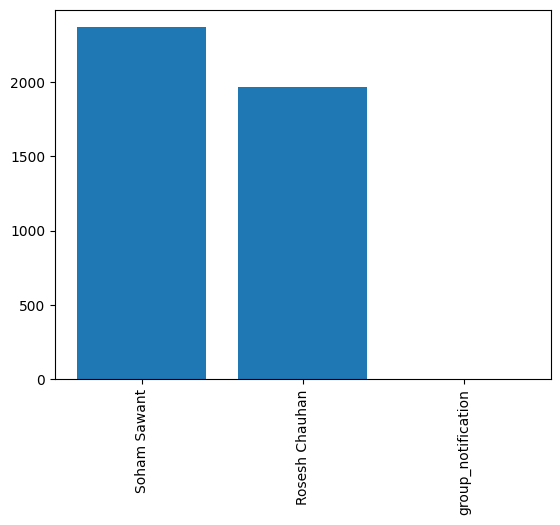

In [30]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [31]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns = {'index':'name','user':'percent'})

,percent,count
0,Soham Sawant,54.58
1,Rosesh Chauhan,45.40
2,group_notification,0.02


In [32]:
words = []

for message in df['message']:
  words.extend(message.split())

In [33]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,hai,709
1,to,298
2,Ha,279
3,ka,269
4,nahi,263
5,kya,240
6,?,236
7,raha,205
8,<Media,201
9,omitted>,201


In [34]:
temp = df[df['user'] != 'group_notification']
temp

,date,user,message,year,month,day,hour,minute
1,2025-05-29 19:35:00,Soham Sawant,Waiting for this message\n,2025,May,29,19,35
2,2025-05-31 18:07:00,Rosesh Chauhan,Mujhe sab message send kar na\n,2025,May,31,18,7
3,2025-05-31 18:07:00,Rosesh Chauhan,Cdac ke vagere\n,2025,May,31,18,7
4,2025-05-31 18:07:00,Rosesh Chauhan,Imp honge jo\n,2025,May,31,18,7
5,2025-05-31 18:07:00,Soham Sawant,Abhi ?\n,2025,May,31,18,7
...,...,...,...,...,...,...,...,...
4332,2026-01-30 14:15:00,Rosesh Chauhan,Kya fayda jaake\n,2026,January,30,14,15
4333,2026-01-30 14:16:00,Rosesh Chauhan,Aur Friday ko most of the times to sdw absent ...,2026,January,30,14,16
4334,2026-01-30 14:16:00,Soham Sawant,Wohi\n,2026,January,30,14,16
4335,2026-01-30 14:16:00,Soham Sawant,Kaunsa mujra karna rehta Friday ko isko kya pa...,2026,January,30,14,16


In [35]:
temp = temp[temp['message'] != '<Media omitted\n>']

In [36]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [37]:
words = []

for message in temp['message']:
  for word in message.lower().split():
    if word not in stop_words:
      words.append(word)


In [38]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,<media,201
1,omitted>,201
2,=,111
3,hai?,94
4,bhej,67
5,🙏,53
6,kya?,51
7,vs,51
8,shayad,43
9,lec,43


In [39]:
import emoji

emojis = []
for message in df['message']:
  emojis.extend([c for c in message if emoji.is_emoji(c)])

In [40]:
emoji_df = pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

<BarContainer object of 5 artists>

c:\Users\ASUS\wp_chat_analysis\venv\Lib\site-packages\IPython\core\events.py:96: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\ASUS\wp_chat_analysis\venv\Lib\site-packages\IPython\core\events.py:96: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\ASUS\wp_chat_analysis\venv\Lib\site-packages\IPython\core\events.py:96: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\ASUS\wp_chat_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ASUS\wp_chat_analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128128 (\N{SKULL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\User

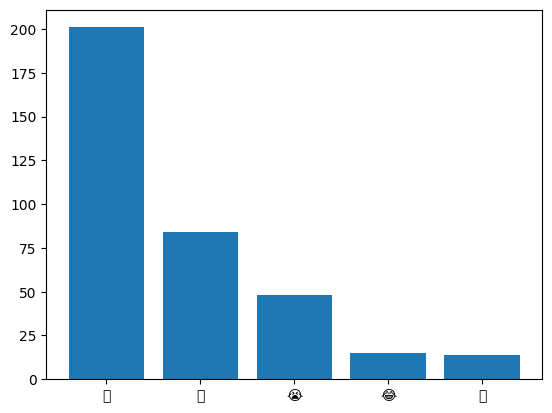

In [41]:
plt.bar(emoji_df[0].head(),emoji_df[1].head())

In [42]:
df['month_num'] = df['date'].dt.month

In [43]:
df

,date,user,message,year,month,day,hour,minute,month_num
0,2025-05-31 18:05:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025,May,31,18,5,5
1,2025-05-29 19:35:00,Soham Sawant,Waiting for this message\n,2025,May,29,19,35,5
2,2025-05-31 18:07:00,Rosesh Chauhan,Mujhe sab message send kar na\n,2025,May,31,18,7,5
3,2025-05-31 18:07:00,Rosesh Chauhan,Cdac ke vagere\n,2025,May,31,18,7,5
4,2025-05-31 18:07:00,Rosesh Chauhan,Imp honge jo\n,2025,May,31,18,7,5
...,...,...,...,...,...,...,...,...,...
4332,2026-01-30 14:15:00,Rosesh Chauhan,Kya fayda jaake\n,2026,January,30,14,15,1
4333,2026-01-30 14:16:00,Rosesh Chauhan,Aur Friday ko most of the times to sdw absent ...,2026,January,30,14,16,1
4334,2026-01-30 14:16:00,Soham Sawant,Wohi\n,2026,January,30,14,16,1
4335,2026-01-30 14:16:00,Soham Sawant,Kaunsa mujra karna rehta Friday ko isko kya pa...,2026,January,30,14,16,1


In [44]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [45]:
timeline

,year,month_num,month,message
0,2025,5,May,37
1,2025,6,June,558
2,2025,7,July,608
3,2025,8,August,567
4,2025,9,September,508
5,2025,10,October,635
6,2025,11,November,670
7,2025,12,December,344
8,2026,1,January,410


In [46]:
time = []
for i in range(timeline.shape[0]):
  time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [47]:
timeline['time'] = time

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'May-2025'),
  Text(1, 0, 'June-2025'),
  Text(2, 0, 'July-2025'),
  Text(3, 0, 'August-2025'),
  Text(4, 0, 'September-2025'),
  Text(5, 0, 'October-2025'),
  Text(6, 0, 'November-2025'),
  Text(7, 0, 'December-2025'),
  Text(8, 0, 'January-2026')])

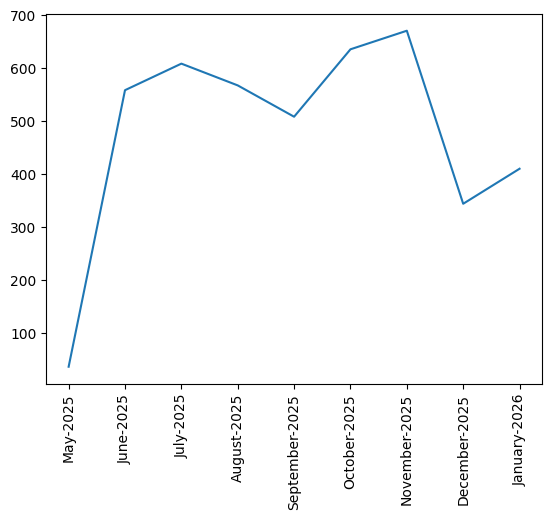

In [48]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation= 'vertical')

In [49]:
df['only_date'] = df['date'].dt.date

In [50]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

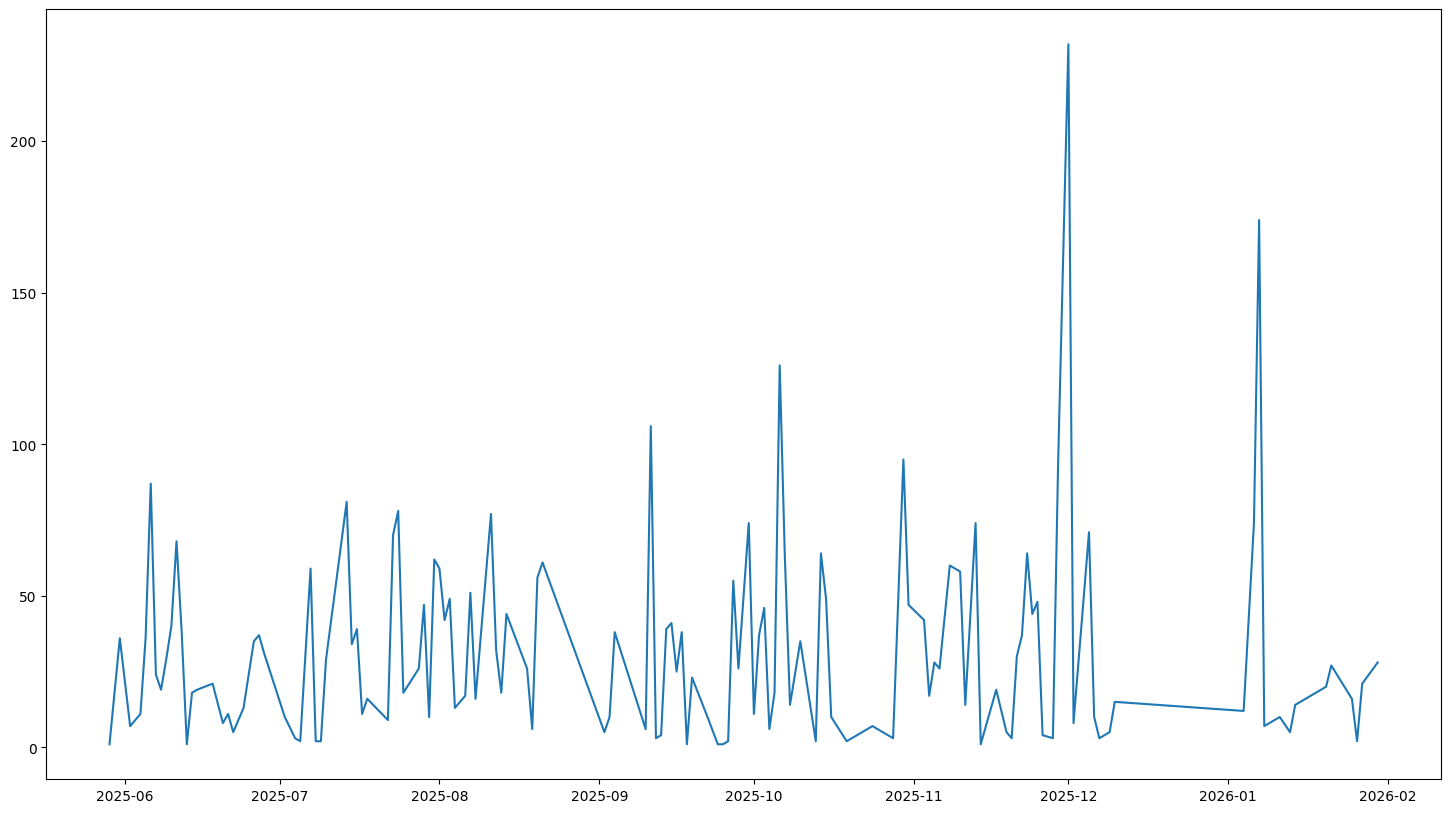

In [51]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [52]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2025-05-31 18:05:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025,May,31,18,5,5,2025-05-31
1,2025-05-29 19:35:00,Soham Sawant,Waiting for this message\n,2025,May,29,19,35,5,2025-05-29
2,2025-05-31 18:07:00,Rosesh Chauhan,Mujhe sab message send kar na\n,2025,May,31,18,7,5,2025-05-31
3,2025-05-31 18:07:00,Rosesh Chauhan,Cdac ke vagere\n,2025,May,31,18,7,5,2025-05-31
4,2025-05-31 18:07:00,Rosesh Chauhan,Imp honge jo\n,2025,May,31,18,7,5,2025-05-31


In [53]:
df['day_name'] = df['date'].dt.day_name()

In [54]:
df['day_name'].value_counts()

day_name
Monday       894
Thursday     844
Wednesday    718
Tuesday      629
Friday       541
Saturday     429
Sunday       282
Name: count, dtype: int64

In [55]:
period = []
for hour in df[['day_name','hour']]['hour']:
  if hour == 23:
    period.append(str(hour) + "-" + str('00'))
  elif hour == 0:
    period.append(str('00') + "-" + str(hour+1))
  else:
    period.append(str(hour) + "-" + str(hour+1))    

In [56]:
df['period'] = period

In [57]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
438,2025-06-18 16:22:00,Rosesh Chauhan,Tu?\n,2025,June,18,16,22,6,2025-06-18,Wednesday,16-17
4288,2026-01-27 00:26:00,Rosesh Chauhan,Mai kal nhi aane ka.doch raha ju\n,2026,January,27,0,26,1,2026-01-27,Tuesday,00-1
164,2025-06-06 23:36:00,Soham Sawant,karunga kab\n,2025,June,6,23,36,6,2025-06-06,Friday,23-00
962,2025-07-24 00:06:00,Rosesh Chauhan,Mam kuch boli kya?\n,2025,July,24,0,6,7,2025-07-24,Thursday,00-1
2979,2025-11-05 11:12:00,Soham Sawant,Iska question kidhar hai ?\n,2025,November,5,11,12,11,2025-11-05,Wednesday,11-12


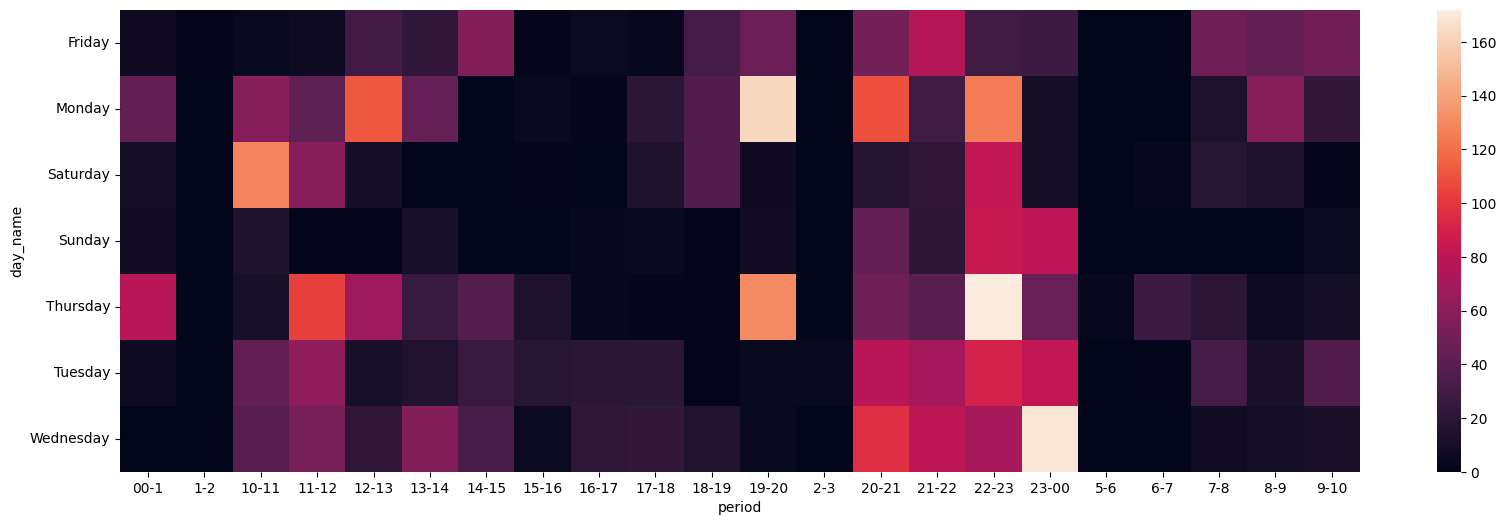

In [58]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation = 'horizontal')
plt.show()

app_link = https://wpchatanalysis-ubhqzszbsjoyoy5lc2vnz4.streamlit.app/